In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
rng = np.random.default_rng(seed = 1001)
X = rng.uniform(-10, 10, (100, 2))
y = np.int32(np.zeros(X.shape[0]))
y[X[:, 1] > X[:, 0]] = 1
X = np.concatenate((X, 
                   rng.multivariate_normal([-5, 5], np.eye(2), 10)), 
                   axis = 0)
y = np.concatenate((y, np.int32(np.zeros(10))))


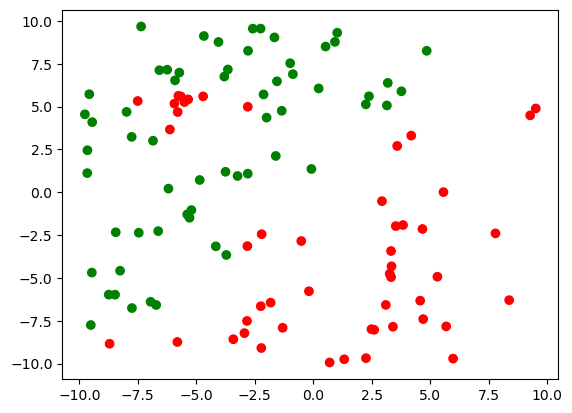

In [26]:
colors = np.where(y==0,'red','green')
plt.scatter(X[:,0],X[:,1],color = colors)
plt.show()

In [4]:
X.shape

(110, 2)

In [7]:
y

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
def Knn(X,y,p,k):
    dist = np.linalg.norm(X-p,axis=1)
    
   
   
    indxs = np.argsort(dist)
    
    labels = y[indxs][1:k]
    counts = np.bincount(labels)
    return np.argmax(counts)
    
    
    


In [35]:
Knn(X,y,X[9],4)

1

In [29]:
x1_mn,x1_mx = X[:,0].min()-1 , X[:,0].max()+1
x2_mn,x2_mx = X[:,1].min()-1,X[:,1].max()+1 

xx,yy = np.meshgrid(np.arange(x1_mn,x1_mx,0.1),np.arange(x2_mn,x2_mx,0.1))


In [30]:
xx,yy

(array([[-10.76417819, -10.66417819, -10.56417819, ...,  10.23582181,
          10.33582181,  10.43582181],
        [-10.76417819, -10.66417819, -10.56417819, ...,  10.23582181,
          10.33582181,  10.43582181],
        [-10.76417819, -10.66417819, -10.56417819, ...,  10.23582181,
          10.33582181,  10.43582181],
        ...,
        [-10.76417819, -10.66417819, -10.56417819, ...,  10.23582181,
          10.33582181,  10.43582181],
        [-10.76417819, -10.66417819, -10.56417819, ...,  10.23582181,
          10.33582181,  10.43582181],
        [-10.76417819, -10.66417819, -10.56417819, ...,  10.23582181,
          10.33582181,  10.43582181]]),
 array([[-10.9378559, -10.9378559, -10.9378559, ..., -10.9378559,
         -10.9378559, -10.9378559],
        [-10.8378559, -10.8378559, -10.8378559, ..., -10.8378559,
         -10.8378559, -10.8378559],
        [-10.7378559, -10.7378559, -10.7378559, ..., -10.7378559,
         -10.7378559, -10.7378559],
        ...,
        [ 10.46214

In [31]:
Z = np.zeros(xx.shape, dtype=int)
k = 3

In [39]:
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        p = np.array([[xx[i,j], yy[i,j]]])
        Z[i,j] = Knn(X,y,p,5)
colr = np.where(y==0,'blue','red')

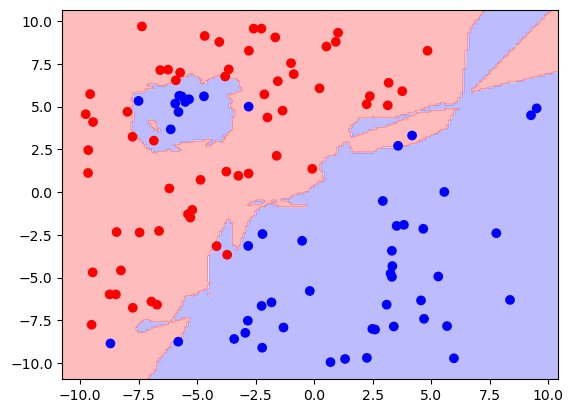

In [40]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X[:,0],X[:,1],color=colr)
plt.show()

In [78]:
class NearestNeighbors:
    def __init__(self,k_neighbors=None):
        self.neighbors = k_neighbors
    def fit(self,X,y):
        self.data = X
        self.target = y
    def predict(self,X):
        if self.data.shape[1] != X.shape[1]:
            return "Dimension mismatch between data and point"
       
        self.predictions = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            dist = np.linalg.norm(self.data-X[i],axis=1)
            indxs = np.argsort(dist)
            k = self.neighbors
            labels = self.target[indxs][1:k]
            counts = np.bincount(labels)
            self.predictions[i] = np.argmax(counts) 
            
        return self.predictions
    
        

In [79]:
class Classification_report:
    def __init__(self,y_pred,y_actual):
        self.confusion_mat = np.zeros((2,2))
        for i in range(y_pred.shape[0]):
            if y_pred[i] == 0 and y_actual[i] == 0:
                self.confusion_mat[0][0] += 1 
            elif y_pred[i] == 0 and y_actual[i] == 1:
                self.confusion_mat[0][1] += 1 
            elif y_pred[i] == 1 and y_actual[i] == 1:
                self.confusion_mat[1][1] += 1 
            else:
                self.confusion_mat[1][0] += 1 
        self.precision_score = None 
        self.accuracy_score = None 
        self.recall_value = None 
        self.f1_score = None 
    def Accuracy_score(self):
        positive = self.confusion_mat[1][1] + self.confusion_mat[0][0]
        total = np.sum(self.confusion_mat)
        self.accuracy_score = positive/total
        return positive/total

    def Precision_score(self):
        TP = self.confusion_mat[1][1]
        total = self.confusion_mat[1][1] + self.confusion_mat[0][1]
        self.precision_score = TP/total if total != 0 else 0 
        return self.precision_score 

    def Recall_value(self):
        TP = self.confusion_mat[1][1] 
        total = self.confusion_mat[1][1] + self.confusion_mat[1][0]
        self.recall_value = TP/total if total != 0 else 0 
        return self.recall_value 

    def F1_score(self):
        if self.precision_score is None:
            p = self.Precision_score()
        if self.recall_value is None:
            s = self.Recall_value()

        if self.recall_value+self.precision_score == 0:
            self.f1_score = 0 
            return 0 
            
        self.f1_score = 2* ((self.precision_score*self.recall_value)/(self.recall_value+self.precision_score))
        return self.f1_score 

    
        
        
        

In [144]:
Knn = NearestNeighbors(k_neighbors=5)

In [145]:
X_train,X_test = X[:80],X[80:]

In [146]:
Y_train,Y_test = y[:80],y[80:]

In [147]:
print(X_train.shape,Y_train.shape)

(80, 2) (80,)


In [148]:
Knn.fit(X_train,Y_train)

In [149]:
y_train_pres = Knn.predict(X_train)

In [150]:
Y_train

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [151]:
Metrics = Classification_report(y_train_pres,Y_train)

In [152]:
Metrics.Accuracy_score()

0.9625

In [153]:
Metrics.Precision_score()

1.0

In [154]:
Metrics.Recall_value()

0.9444444444444444

In [155]:
Metrics.F1_score()

0.9714285714285714

In [156]:
y_test_preds = Knn.predict(X_test)

In [157]:
M_test = Classification_report(y_test_preds,Y_test)

In [158]:
M_test.Accuracy_score()

0.6

In [159]:
M_test.Recall_value()

0.42857142857142855

In [160]:
M_test.Precision_score()

1.0

In [161]:
y_test_preds

array([1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [162]:
Y_test

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [123]:
y_test_preds==Y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False])

In [124]:
X_test

array([[-0.0819926 ,  1.36206548],
       [ 4.66314383, -2.14307875],
       [-9.57621014,  5.72793536],
       [-3.65273305,  7.17150432],
       [-2.24633272, -6.65064731],
       [-1.6627568 ,  9.04399952],
       [ 3.40279935, -7.85291836],
       [ 1.31989773, -9.75020323],
       [ 2.24382811,  5.13559948],
       [ 4.69557521, -7.40452796],
       [-1.60563163,  2.12212745],
       [ 3.09789711, -6.5759933 ],
       [-6.71680815, -6.58077027],
       [-2.82003601, -3.14293371],
       [ 3.34176203, -4.32130888],
       [-9.65539457,  2.45576149],
       [ 0.6976987 , -9.9378559 ],
       [-3.72002199, -3.66009333],
       [ 8.37061908, -6.29818744],
       [ 3.58441194,  2.7059431 ],
       [-2.80144679,  4.99517376],
       [-5.76730491,  5.63106062],
       [-4.710167  ,  5.60127591],
       [-5.66083287,  5.59222141],
       [-7.50671768,  5.32955122],
       [-6.1311857 ,  3.66719911],
       [-5.79854691,  4.68577504],
       [-5.34959454,  5.42658351],
       [-5.93981836,

In [164]:
from sklearn.neighbors import KNeighborsClassifier

In [165]:
knn_sk = KNeighborsClassifier(n_neighbors=5)

In [166]:
knn_sk.fit(X_train,Y_train)

KNeighborsClassifier()

In [167]:
y_train_pred2 = knn_sk.predict(X_train)

In [168]:
from sklearn.metrics import classification_report

In [169]:
report_sk = classification_report(Y_train, y_train_pred2)

In [171]:
print(report_sk)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        29
           1       0.94      1.00      0.97        51

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [172]:
y_pred_test2 = knn_sk.predict(X_test)

In [174]:
print(classification_report(Y_test, y_pred_test2))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        21
           1       0.43      1.00      0.60         9

    accuracy                           0.60        30
   macro avg       0.71      0.71      0.60        30
weighted avg       0.83      0.60      0.60        30

